<div style="text-align: right"> FPHP7 </div>

# A Statistical Analysis of the Public's Fear of Crime Using Data from the *Crime Survey for England and Wales, 2013/14*

Introduction
<br>
The issue of a public individual's fear of being a victim of a criminal act such as a mugging, rape or burglary has come to the attention of policymakers often. The following report, analysing data from a 2013-14 face-to-face victimisation survey which asked respondents about criminal experiences in the 12 months prior to the survey, shows the relationships between sex, ethnic group and lifestyle choices of the respondents, and their worries about being potential victims of crime in the future. The aim of this analysis is to provide policymakers with the data necessary to influence future legislations, and quell any misconceptions that the public or media may have of the general fear of crime in England and Wales.

In [210]:
# Import Pandas, Numpy, Scipystats and Matplotlib to assist statistical analysis.
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

In [211]:
# Import the data from the Crime Survey for England and Wales, 2013/14.
csew = pd.read_stata('Desktop/SECUPSM1/tutorials/data/csew1314_teaching_cleaned.dta')

In order to show the extent of the public's fear of crime, a graph can be plotted to show the variable 'worryx' which corresponds to 'Worry about being a victim of crime', where a higher score denotes a higher level of worry. The data comprising 'worryx' is derived from the variables:
<br>
**Wburgl: Worry about having your home broken into.
<br>
Wmugged: Worry about being mugged.
<br>
Wraped: Worry about being raped.
<br>
Wattack: Worry about being physically attacked by a stranger.
<br>
Wraceatt: Worry about being attacked by a stranger because of skin colour, ethnic origin or religion.**

In [212]:
# Assign the name 'worry' to the column 'worryx'.
worry = csew['worryx']

**Figure 1. - Histogram displaying the levels of worry about being a victim of crime in the population.**

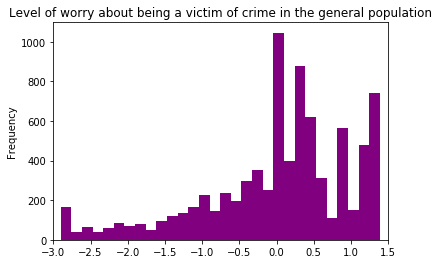

In [225]:
# Plot a histogram displaying the level of worry about being a victim of crime in the general population.
worry.plot.hist(bins=30, title='Level of worry about being a victim of crime in the general population', xlim=(-3, 1.5), color='purple')

As shown by Figure 1., members of the public are only slightly worried about being victims of crime. A majority of people expressed the fact that they were ‘not very worried’ with a significant amount stating that they were ‘not at all worried’ about being victims of crime. This can be explained by the histogram data forming a cluster around the 0.0 to 0.5 values which show that the combined level of worry from the variables making up ‘worryx’ is quite low.
<br>
<br>
The following value counts display people’s specific answers to various questions asking about their worry about being victims of certain crimes.

In [226]:
# Value counts of 'How worried about having your home broken into'.
csew['wburgl'].value_counts()

Not very worried      4150
Fairly worried        2302
Not at all worried    1338
Very worried           961
Don't know               3
(Not applicable)         2
Name: wburgl, dtype: int64

In [227]:
# Value counts of 'How worried about being mugged and robbed'.
csew['wmugged'].value_counts()

Not very worried      4247
Not at all worried    2055
Fairly worried        1650
Very worried           752
Don't know              38
(Not applicable)        14
Name: wmugged, dtype: int64

In [228]:
# Value counts of 'How worried about being raped'.
csew['wraped'].value_counts()

Not at all worried    4249
Not very worried      2781
Very worried           705
Fairly worried         685
(Not applicable)       286
Don't know              44
Refused                  6
Name: wraped, dtype: int64

In [229]:
# Value counts of 'How worried about being physically attacked by strangers'.
csew['wattack'].value_counts()

Not very worried      4132
Not at all worried    2260
Fairly worried        1565
Very worried           750
Don't know              39
(Not applicable)         9
Refused                  1
Name: wattack, dtype: int64

In [230]:
# Value counts of 'How worried about being attacked because of skin colour, ethnic origin or religion'.
csew['wraceatt'].value_counts()

Not at all worried    5021
Not very worried      2522
Fairly worried         546
Very worried           348
(Not applicable)       280
Don't know              39
Name: wraceatt, dtype: int64

Examining the tables above, most survey respondents were worried about their homes being burgled: 10.9% of respondents said that they were ‘very worried’ and 26.2% said that they were ‘fairly worried’ that their homes would be broken into, as opposed to 8.6% of respondents ‘very worried’ and 18.8% ‘fairly worried’ that they would be mugged on the street. Reasons for this are complicated: there is a possibility that respondents fear their homes being burgled more than being mugged on the street because it can be assumed that objects of greater value can be stolen from a home compared to objects on one’s person in the street. Solutions to this issue are suggested to be directed at increased home security such as increased availability of alarm systems and spreading awareness on the importance of locking doors when leaving the residence, as well as not disclosing long periods of time that the home will be left unoccupied.
<br>
<br>
The relationship between males and females and their worry about being a victim of crime can also be analysed:
<br>
<br>
**Figure 2. - Graph showing the differences between male and female worry about being a victim of crime.**

In [231]:
# Assign the name 'respondent_male' to the data labelled 'Male' in the column 'sex', and the name 'respondent_female' to the data labelled 'Female' in the same column.
respondent_male = csew[csew['sex'] == 'Male']['worryx']
respondent_female = csew[csew['sex'] == 'Female']['worryx']

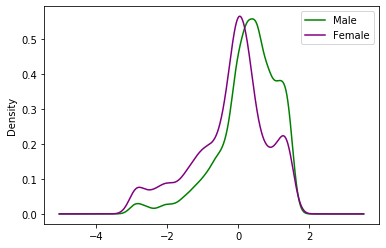

In [232]:
# Plot a graph of male respondents and their worry about being a victim of crime against female respondents.
respondent_male.plot.kde(label='Male', legend=True, color='green')
respondent_female.plot.kde(label='Female', legend=True, color='purple')

In [233]:
# Perform an unpaired-samples t-test to determine if there is a difference between male and female worry.
ss.ttest_ind(respondent_male, respondent_female, nan_policy='omit')

Ttest_indResult(statistic=22.551948819863235, pvalue=2.623493094083113e-109)

Figure 2. shows a graph where male and female worries about being crime victims are plotted together. As determined by Figure 1., both genders do not have a large amount of worry, however there is a difference between genders: males tend to have slightly more worry about being a victim of crime. The subsequent unpaired-samples t-test performed displays a p-value statistic which is smaller than 0.05, indicating a difference between sexes. The increase in male worry could be due to multiple factors, possibly more involvement in gang violence or pub fights.
<br>
<br>
Picking the worry of being a victim of rape, the differences between men and women can be examined in greater detail.

In [222]:
# Form a contingency table, crossing sex of respondent and worry of being a victim of rape, removing irrelevant columns from the data.
contingencytable1 = pd.crosstab(csew['sex'], csew['wraped'])
contingencytable1 = contingencytable1.drop(columns=["(Not applicable)","Don't know", "Refused"])
contingencytable1

wraped,Very worried,Fairly worried,Not very worried,Not at all worried
sex,,,,
Male,112,72,709,2810
Female,593,613,2072,1439


In [223]:
# Calculate the Chi-squared statistic for the above contingency table.
ss.chi2_contingency(contingencytable1)

(1769.385148867118,
 0.0,
 3,
 array([[ 310.04928741,  301.25356295, 1223.04548694, 1868.65166271],
        [ 394.95071259,  383.74643705, 1557.95451306, 2380.34833729]]))

The Chi-squared statistic calculated for the first contingency table (0.0) is extremely small, meaning that the data would be very unlikely under the null hypothesis, thus we reject it. The null hypothesis states that there is no relationship between sex and worry about being a victim of rape, which we dismiss. Moreover, the data table shows that 4.9% of males were ‘very’ or ‘fairly worried’ about being a victim of rape, compared to 25.5% of females. The increased fear of rape in women can be attributed to the fact that it is far more common to see cases in the media reporting sexual assault towards women, creating an atmosphere of fear. Moreover, the fear of being sexually assaulted has been found to have negative impacts on women’s lives such as reducing their mobility and leading to avoidance of behaviours such as walking home alone at night (Keane, 1998).
<br>
<br>
The relationship between how often people frequent nightclubs can also be compared to how safe they feel walking home in the dark.

In [234]:
# Form a contingency table, crossing how often a respondent goes to nightclubs with how safe they feel when walking home after dark, removing irrelevant columns and rows from the data.
contingencytable2 = pd.crosstab(csew['walkdark'], csew['club'])
contingencytable2 = contingencytable2.drop(columns=["Refused", "More than 12 times (Almost every day)", "Between 9 and 12 times (About 3 times a week)"])
contingencytable2 = contingencytable2.drop(index=["Refused", "Don't know"])
contingencytable2

club,None,Between 1 and 3 times (Less than once a week),Between 4 and 8 times (Once to twice a week)
walkdark,,,
Very safe,2386,193,36
Fairly safe,2942,249,31
A bit unsafe,1499,108,15
Very unsafe,792,25,5


In [235]:
# Calculate the Chi-squared statistic for the above contingency table.
ss.chi2_contingency(contingencytable2)

(28.504273042753717,
 7.54866291897053e-05,
 6,
 array([[2405.9515759 ,  181.57529284,   27.47313126],
        [2964.42676005,  223.72298032,   33.85025963],
        [1492.33401763,  112.6252868 ,   17.04069557],
        [ 756.28764642,   57.07644004,    8.63591354]]))

Again, since the p-value is lower than 0.05, we reject the null hypothesis and accept the alternative one, meaning that the variables are not independent. There is in fact a relationship between how often people go to nightclubs and how safe they feel walking home after dark. Policies that can be implemented to tackle this problem should focus on factors that make a journey home safer - adequate street lighting, raising awareness of various apps that can be used which alert emergency services if an individual signifies that they are in danger. 
<br>
<br>
When looking at ethnic groups, an ANOVA test can be performed.
<br>
<br>
**Figure 3. - Boxplot grouped by ethnic groups.**

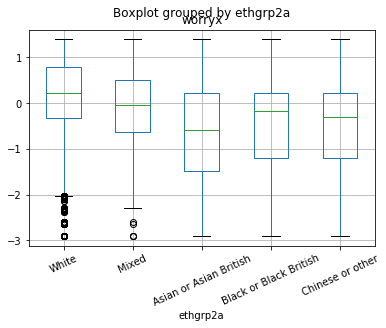

In [240]:
# Plot a boxplot comparing the means of how worried various ethnic groups are about being victims of crime.
csew.boxplot('worryx', by='ethgrp2a', rot=25,)

In [241]:
# Select cases where 'ethnic group = White', save as a new DataFrame, compare it with the 'worryx' column, then remove all missing values with the dropna() command.
worry_white = csew[csew['ethgrp2a'] == 'White']['worryx'].dropna()

# Repeat the above process for all other ethnic groups.
worry_mixed = csew[csew['ethgrp2a'] == 'Mixed']['worryx'].dropna()
worry_aoab = csew[csew['ethgrp2a'] == 'Asian or Asian British']['worryx'].dropna()
worry_bobb = csew[csew['ethgrp2a'] == 'Black or Black British']['worryx'].dropna()
worry_coo = csew[csew['ethgrp2a'] == 'Chinese or other']['worryx'].dropna()

In [242]:
# Perform an ANOVA test with the above DataFrames.
ss.f_oneway(worry_white, worry_mixed, worry_aoab, worry_bobb, worry_coo)

F_onewayResult(statistic=86.884723752212, pvalue=2.0771116436549114e-72)

Differences between the ethnic groups is clearly displayed in Figure 3., where it can be clearly identified that ‘White’ people worry far less about being victims of crime, as opposed to ‘Asian or Asian British’ people who display the highest rate of worry. The ANOVA test can be performed in order to determine whether the mean is the same for all ethnic groups. The calculated statistic is once again smaller than 0.05, meaning that the means are different for different ethnic groups i.e. the levels of worry vary. 

In [243]:
# Form a contingency table, crossing ethnic group with worry about being a victim of a racially motivated attack, removing irrelevant columns from the data.
contingencytable3 = pd.crosstab(csew['ethgrp2a'], csew['wraceatt'])
contingencytable3 = contingencytable3.drop(columns=["(Not applicable)","Don't know"])
contingencytable3

wraceatt,Very worried,Fairly worried,Not very worried,Not at all worried
ethgrp2a,,,,
White,210,381,2174,4832
Mixed,10,7,33,28
Asian or Asian British,77,98,169,87
Black or Black British,37,39,100,50
Chinese or other,14,20,45,22


In [244]:
# Calculate the Chi-squared statistic for the above contingency table.
ss.chi2_contingency(contingencytable3)

(882.9421427714443,
 2.641284749391911e-181,
 12,
 array([[3.13501245e+02, 4.90971778e+02, 2.27108230e+03, 4.52144468e+03],
        [3.21878335e+00, 5.04091071e+00, 2.33176805e+01, 4.64226254e+01],
        [1.77858413e+01, 2.78542630e+01, 1.28845132e+02, 2.56514763e+02],
        [9.32621843e+00, 1.46057156e+01, 6.75614846e+01, 1.34506581e+02],
        [4.16791178e+00, 6.52733310e+00, 3.01934069e+01, 6.01113483e+01]]))

With regard to ethnic groups worrying about being victims of racially motivated attacks, a Chi-squared test carried out displays an extremely small p-value, suggesting that there is a relationship between ethnic group and worry about being a victim of a racially motivated attack. ‘White’ people tend to be less worried about being attacked due to their race, whereas ‘Asian or Asian British’ and ‘Black or Black British’ people tended to voice more concerns.
<br>
<br>
Also examined was the relationship between number of children under 16 in the household, and the adult respondent’s fear of burglary.


In [247]:
# Form a contingency table, crossing ethnic group with worry about being a victim of a racially motivated attack, removing irrelevant columns and rows from the data.
contingencytable4 = pd.crosstab(csew['nchil'], csew['wburgl'])
contingencytable4 = contingencytable4.drop(columns=["(Not applicable)","Don't know"])
contingencytable4 = contingencytable4.drop(index=[5, 6, 7])
contingencytable4

wburgl,Very worried,Fairly worried,Not very worried,Not at all worried
nchil,,,,
0,679,1630,3057,1064
1,137,312,482,129
2,95,251,439,97
3,39,82,133,35
4,6,18,32,10


In [249]:
# Calculate the Chi-squared statistic for the above contingency table.
ss.chi2_contingency(contingencytable4)

(42.78890405996245,
 2.4515455357512247e-05,
 12,
 array([[ 704.37492838, 1689.46831672, 3052.53695428,  983.61980062],
        [ 116.11779535,  278.51266185,  503.21760055,  162.15194225],
        [  96.61876934,  231.74355449,  418.71502234,  134.92265383],
        [  31.658531  ,   75.93411252,  137.19800619,   44.20935029],
        [   7.22997594,   17.34135442,   31.33241664,   10.09625301]]))

The null hypothesis can once again be dismissed - there is a relationship with the amount of children in a household and the adult respondent’s fear of burglary. Families with more children tended to be more fearful of possible break-ins, likely due to the property being larger to accommodate more people, and thus having more items of increased worth. Families also likely feared for the safety of their children if one of them was to come into contact with a burglar by accident.
<br>
<br>
Finally, confidence in the Criminal Justice System can be plotted against people’s worry about being a victim of crime.
<br>
<br>
**Figure 4. - Histogram of confidence in the CJS against worry about being a victim of crime.**

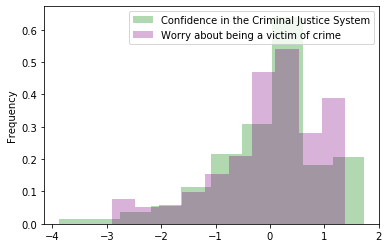

In [250]:
# Plot a histogram displaying the level of confidence in the Criminal Justice System against the level of worry about being a victim of crime in the general population.
csew['confx'].plot.hist(label='Confidence in the Criminal Justice System', legend=True, density=True, alpha=0.3, color='green')
csew['worryx'].plot.hist(label='Worry about being a victim of crime', legend=True, density=True, alpha=0.3, color='purple')

In [251]:
# Perform a paired-samples t-test to determine if there is a difference between confidence in the Criminal Justice System and level of worry about being a victim of crime.
ss.ttest_rel(csew['confx'], csew['worryx'], nan_policy='omit')

Ttest_relResult(statistic=2.9615149433232566, pvalue=0.0030708493078052527)

The paired-samples t-test shows that there is a statistical difference between confidence in the Criminal Justice System and worry about being a victim, suggesting that people who have more faith in the system worry less about being victims of crime as they believe that e.g. people at risk of committing more serious crimes have already been convicted of more minor crimes and thus are less likely to be on the streets, thus they are less worried about being victims of crimes.

It can be concluded that, despite the general worry in the population being quite low, there are significant statistical relationships between male and female worry of crime, sex and worry about being a victim of rape, ethnic group and general worry as well as worry about being a victim of a racist attack, number of children and fear of being burgled, and confidence in the Criminal Justice System v.s. worrying about being a victim. Policies combatting these fears in society should be directed at increasing safety measures both in households and on the streets, and working towards a more equal society where the rate of racially motivated attacks decreases substantially. 

**References**
<br>
Keane, C. (1998). Evaluating the Influence of Fear of Crime as an Environmental Mobility Restrictor on Womens Routine Activities. Environment and Behavior, 30(1), 60–74. doi: 10.1177/0013916598301003

wc: 1442